**Import necessary libraries**

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


from google.colab import files


** Load and copy your Kaggle API key - Load the data and print**

In [17]:
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d anthonypino/melbourne-housing-market
!unzip melbourne-housing-market.zip -d data
data = pd.read_csv('data/Melbourne_housing_FULL.csv')
data.head()


Saving kaggle.json to kaggle (2).json
melbourne-housing-market.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  melbourne-housing-market.zip
replace data/MELBOURNE_HOUSE_PRICES_LESS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/MELBOURNE_HOUSE_PRICES_LESS.csv  
replace data/Melbourne_housing_FULL.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/Melbourne_housing_FULL.csv  


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


**Examine the descriptive statistics of dataset**

In [18]:
print(data.describe(include='all'))


           Suburb       Address         Rooms   Type         Price Method  \
count       34857         34857  34857.000000  34857  2.724700e+04  34857   
unique        351         34009           NaN      3           NaN      9   
top     Reservoir  5 Charles St           NaN      h           NaN      S   
freq          844             6           NaN  23980           NaN  19744   
mean          NaN           NaN      3.031012    NaN  1.050173e+06    NaN   
std           NaN           NaN      0.969933    NaN  6.414671e+05    NaN   
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN           NaN      2.000000    NaN  6.350000e+05    NaN   
50%           NaN           NaN      3.000000    NaN  8.700000e+05    NaN   
75%           NaN           NaN      4.000000    NaN  1.295000e+06    NaN   
max           NaN           NaN     16.000000    NaN  1.120000e+07    NaN   

       SellerG        Date      Distance      Postcode  ...      Bathroom  

**Define categorical columns and convert object types and categorical values to category **

In [19]:
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

for column in data.columns:
    if data[column].dtype == 'object' or column in categorical_columns:
        data[column] = data[column].astype('category')


**Check for duplicate data and remove them**

In [20]:
data.drop_duplicates(inplace=True)


**Remove outliers in ‘Landsize’ and ‘BuildingArea’ using z-score method**

In [21]:
data_clean = data[['Landsize', 'BuildingArea']].dropna().reset_index(drop=True)
z_scores = np.abs(stats.zscore(data_clean))
data = data.loc[data_clean[(z_scores < 3).all(axis=1)].index]


**Fill missing values in all columns using appropriate methods**

In [22]:
for column in data.columns:
    if column in categorical_columns:

        data[column] = data[column].fillna(data[column].mode().iloc[0])
    else:

        data[column] = data[column].fillna(data[column].mean())


**Determine independent and dependent variables**

In [23]:
target_variable = 'Price'
feature_variables = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

features = data[feature_variables]
target = data[target_variable]


**Split the data into training and test sets**

In [24]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)


**Define the models in a dictionary and train each model and measure its performance**

In [25]:
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor()
    }
}

for name, m in models.items():
    model = m['model']
    model.fit(features_train, target_train)

    target_pred = model.predict(features_test)

    mse = mean_squared_error(target_test, target_pred)
    mae = mean_absolute_error(target_test, target_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(target_test, target_pred)

    print(f"{name} Performance:")
    print(f"Mean Square Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Square Error (RMSE): {rmse}")
    print(f"Determination Coefficient (R2 Score): {r2}\n")


Lasso Performance:
Mean Square Error (MSE): 237386752851.9402
Mean Absolute Error (MAE): 327876.2912119931
Root Mean Square Error (RMSE): 487223.51426418265
Determination Coefficient (R2 Score): 0.31381856424986876

LinearRegression Performance:
Mean Square Error (MSE): 237387003712.25067
Mean Absolute Error (MAE): 327877.0799551023
Root Mean Square Error (RMSE): 487223.77170274715
Determination Coefficient (R2 Score): 0.3138178391222618

Ridge Performance:
Mean Square Error (MSE): 237352237938.71863
Mean Absolute Error (MAE): 327783.91581256303
Root Mean Square Error (RMSE): 487188.09297715663
Determination Coefficient (R2 Score): 0.313918331791337

ElasticNet Performance:
Mean Square Error (MSE): 268239333665.10593
Mean Absolute Error (MAE): 337346.22137383244
Root Mean Square Error (RMSE): 517918.26929073076
Determination Coefficient (R2 Score): 0.22463722643453088

KNeighborsRegressor Performance:
Mean Square Error (MSE): 258208419429.55292
Mean Absolute Error (MAE): 346740.6940561

**Data Visualization:**

**Create a histogram**

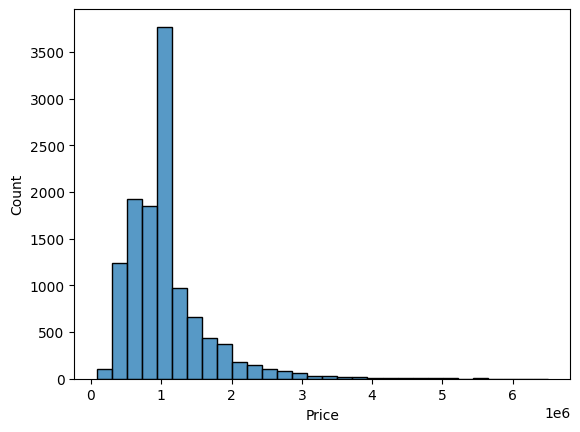

In [27]:
sns.histplot(data['Price'], kde=False, bins=30)
plt.show()


**Draw a pairplot**

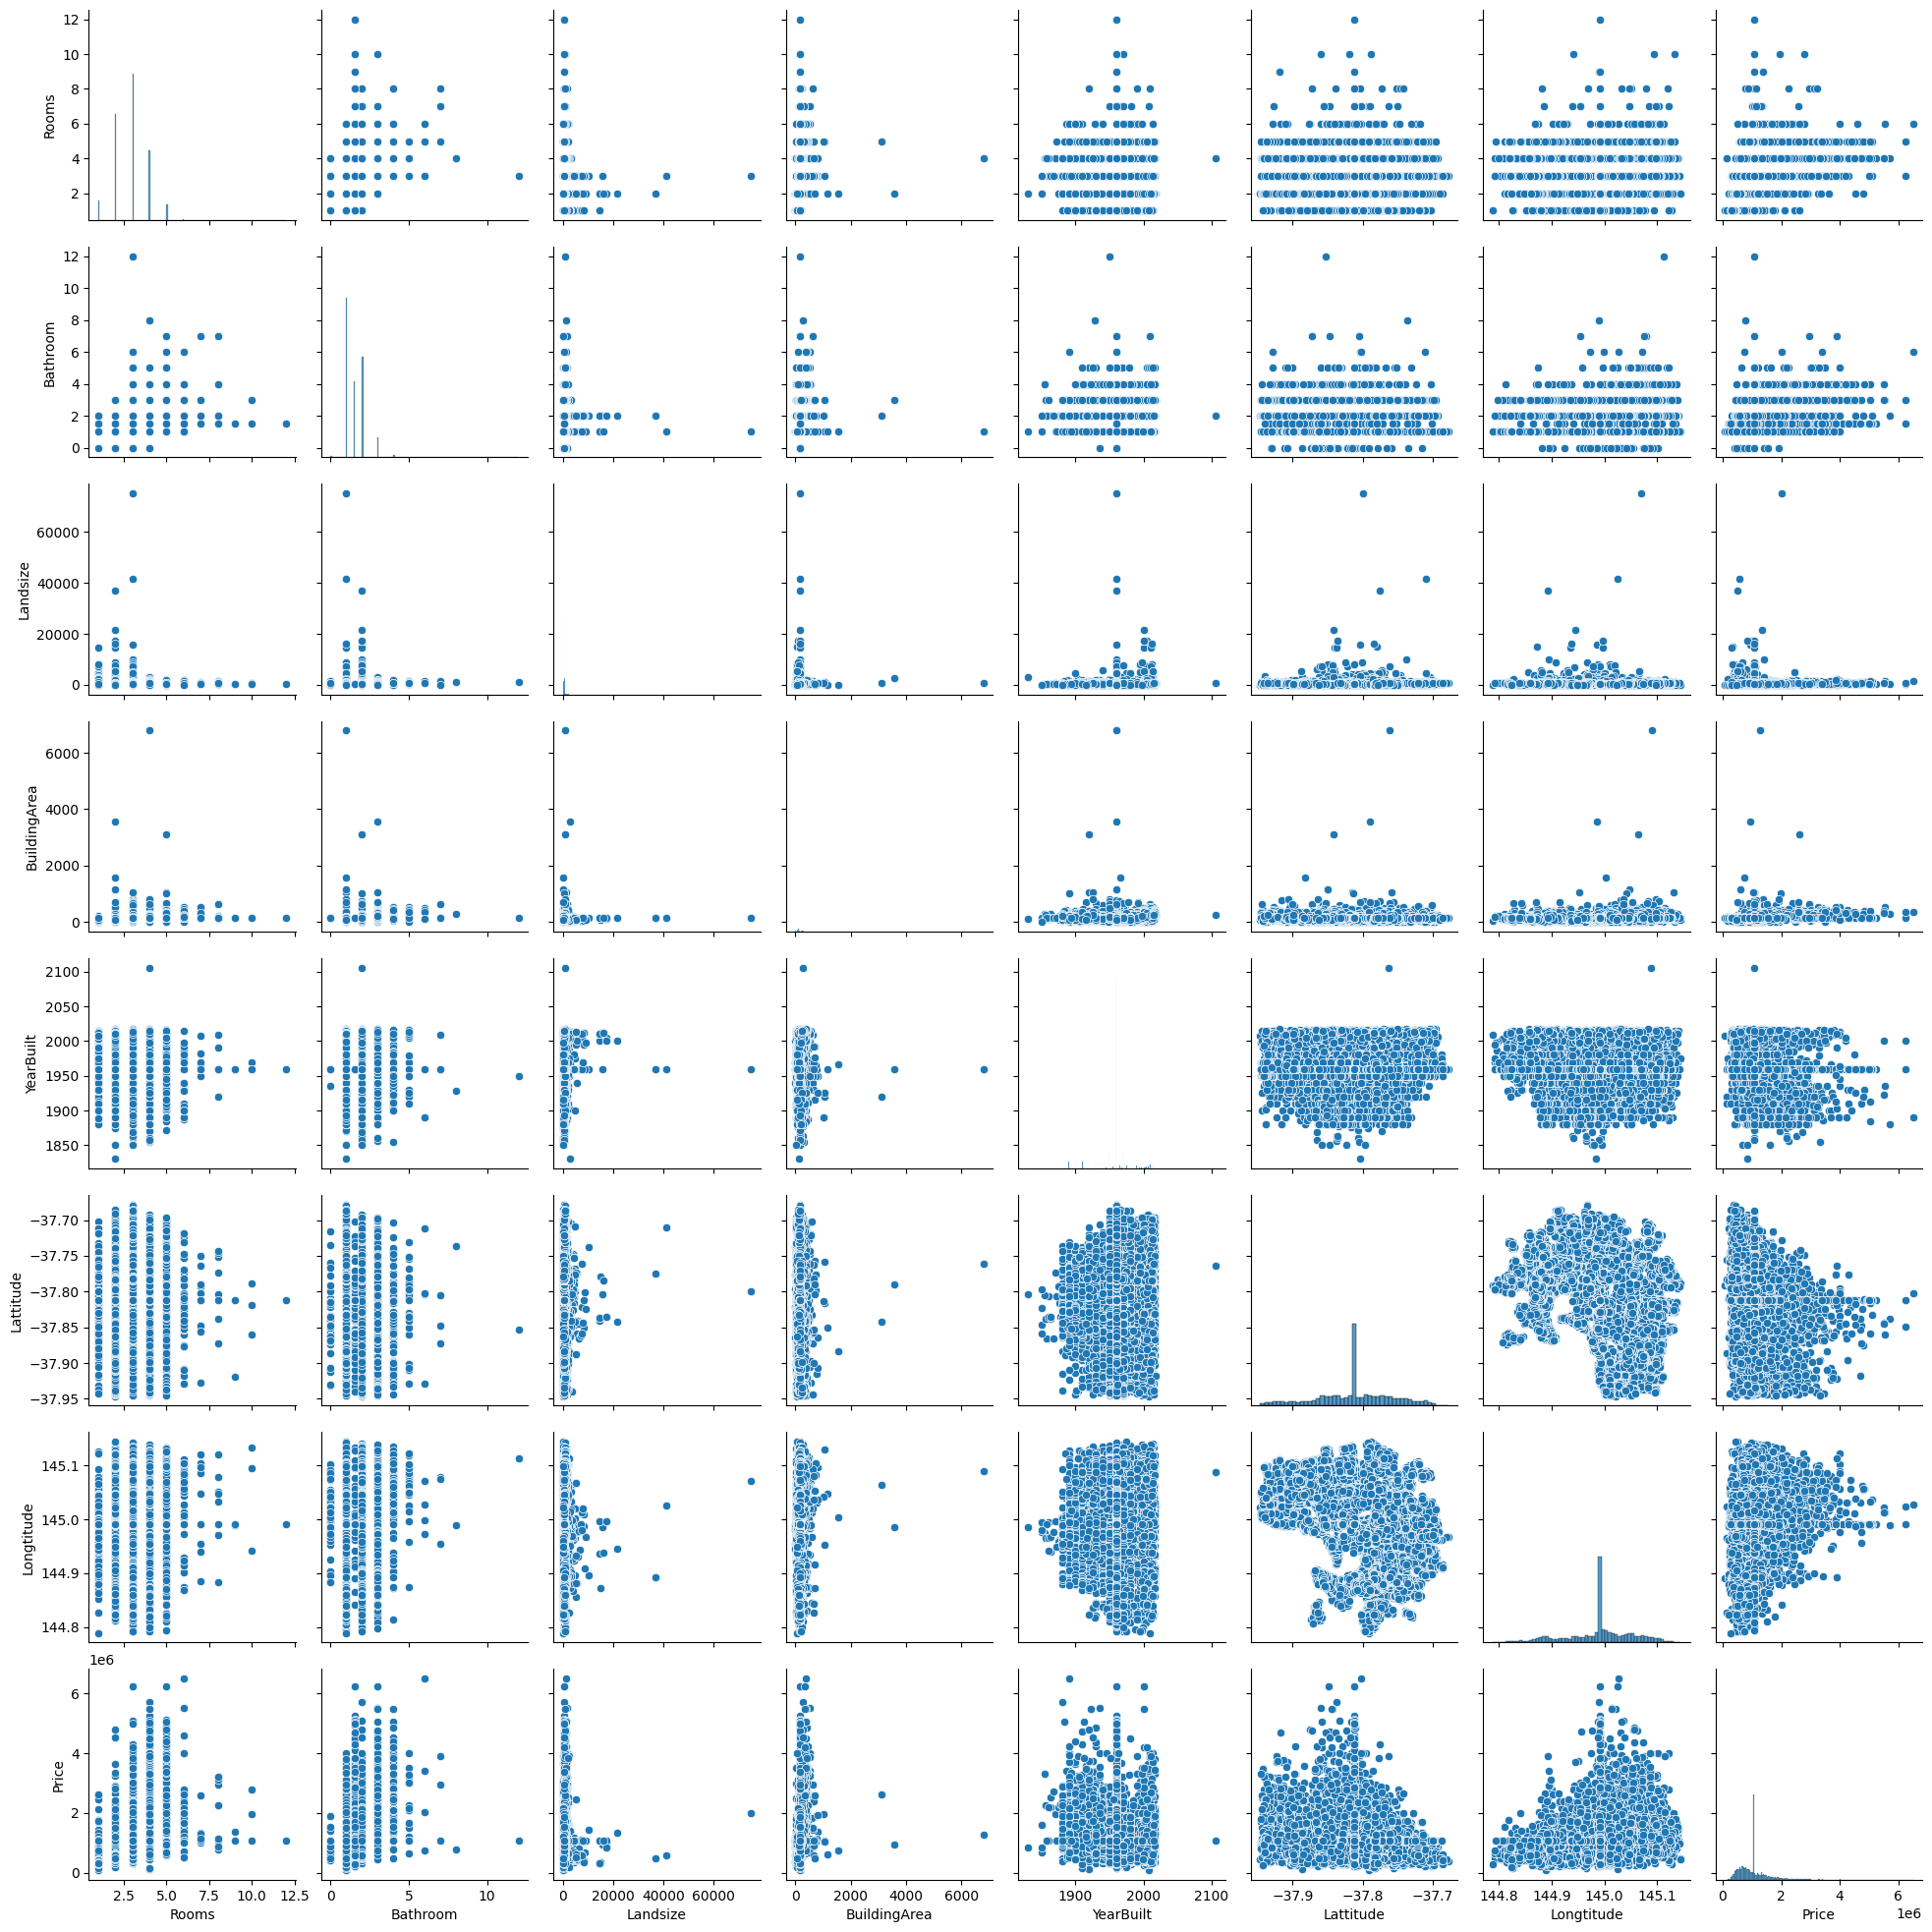

In [28]:
numerical_variables = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Price']
sns.pairplot(data[numerical_variables])
plt.show()


**Draw a correlation matrix**

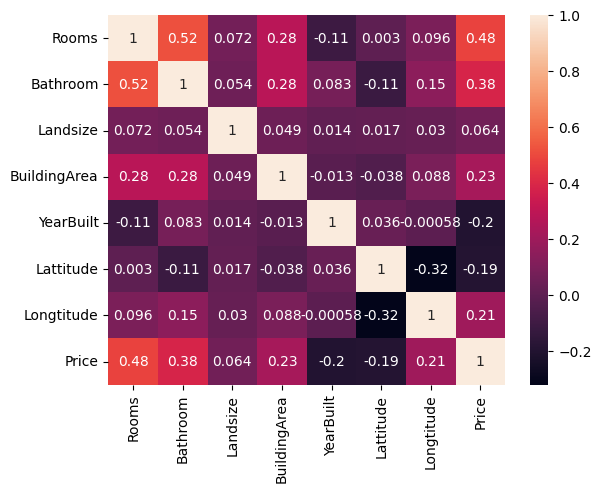

In [29]:
correlation_matrix = data[numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


**Apply Label Encoder and One Hot Encoder for categorical variables**

In [26]:
categorical_variables = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

for variable in categorical_columns:

    data[variable] = label_encoder.fit_transform(data[variable])


    one_hot_encoded = one_hot_encoder.fit_transform(data[variable].values.reshape(-1, 1)).toarray()
    one_hot_encoded_frame = pd.DataFrame(one_hot_encoded, columns=[f"{variable}_{int(i)}" for i in range(one_hot_encoded.shape[1])])
    data = pd.concat([data, one_hot_encoded_frame], axis=1)
